In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('data.csv')
print(data.shape)
data.head(3)

(1000, 3)


,shape,color,area
0,square,yellow,9409.0
1,circle,yellow,4071.5
2,triangle,blue,2028.0


In [3]:
#checking if there are any null or missing values
data[data.isnull().any(axis = 1)]

,shape,color,area


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
shape    1000 non-null object
color    1000 non-null object
area     1000 non-null float64
dtypes: float64(1), object(2)
memory usage: 23.5+ KB


In [ ]:
'''
1. Draw a boxplot showing the area size distribution for each shape.
2. Calculate the mean, max, and standard deviation of the area size of each color.
3. What is the average area size of a yellow square?
4. Which shape is most likely to be green?
'''

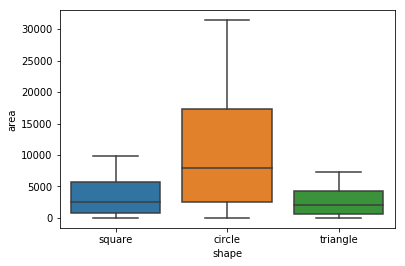

In [5]:
#1. Draw a boxplot showing the area size distribution for each shape.
sns.boxplot(x= 'shape', y ='area', data=data)  

In [6]:
#2. Calculate the mean, max, and standard deviation of the area size of each color.
for shape in data['shape'].unique():
    print('Descriptive Statistics of shape: ', shape)
    print(data[data['shape'] == shape].describe())

Descriptive Statistics of shape:  square
              area
count   477.000000
mean   3411.299790
std    2948.724746
min       1.000000
25%     784.000000
50%    2500.000000
75%    5776.000000
max    9801.000000
Descriptive Statistics of shape:  circle
              area
count    120.00000
mean   10703.48250
std     9244.89754
min       28.30000
25%     2463.00000
50%     7857.15000
75%    17320.42500
max    31415.90000
Descriptive Statistics of shape:  triangle
              area
count   403.000000
mean   2564.967742
std    2165.837676
min       0.800000
25%     546.800000
50%    2106.800000
75%    4218.800000
max    7350.800000


In [7]:
#3. What is the average area size of a yellow square?
np.mean(data[['area']][(data['shape']=='square') & (data['color']=='yellow')])

area    3333.207207
dtype: float64

In [8]:
# 4. Which shape is most likely to be green?

#calculate number of each shape being green:
d = dict()
for shape in data['shape'].unique():
    d[shape] = len(data[(data['color']=='green') & (data['shape']== shape)])

#the shape with most green objects, will be the most likely:
print('Hence the shape most likely to be green is: ', max(d, key=d.get))
print('Count of all shapes being green:', d)

Hence the shape most likely to be green is:  square
Count of all shapes being green: {'square': 47, 'circle': 31, 'triangle': 0}


In [9]:
#5. Given the fact the the object is red, with an area size larger than 3,000 
# what are the chances the object is a square? a triangle? a circle?

#Let's filter out objects that are red and with an area > 3000:
r3000 = data[(data['color']=='red') & (data['area']>3000)]

#now, calculating the chances of these objects being circle, triangle or square:
for shape in data['shape'].unique():
    print('Chance of this object being a {} : {}'.format(shape, len(r3000[r3000['shape']==shape])/r3000.shape[0] ))
    

Chance of this object being a square : 0.168
Chance of this object being a circle : 0.16
Chance of this object being a triangle : 0.672


In [10]:
'''
6. Write a function that calculates the side or radius of an object, 
depending on the shape and area of the object [for an Equilateral triangle - area = (side ^ 2) * sqrt(3) / 4].

7. Add a column to the dataset called "side" that shows the size matching the area in each row, 
round that number to the closest integer (shape side or radios).
'''

d2 = data.copy()

def calc_side(data):
    if (data['shape'] == 'square'):
        return np.sqrt(data['area'])
    elif (data['shape'] == 'circle'):
        return np.sqrt(data['area'])/3.14
    else:
        return np.sqrt(data['area']/(np.sqrt(3)/4))
        #Assumption: All triangles are equilateral triangles

d2['side'] = round(d2.apply(calc_side, axis=1))
d2.head()
#d2.apply(f, axis=1)

,shape,color,area,side
0,square,yellow,9409.0,97.0
1,circle,yellow,4071.5,20.0
2,triangle,blue,2028.0,68.0
3,square,blue,3025.0,55.0
4,square,blue,9216.0,96.0


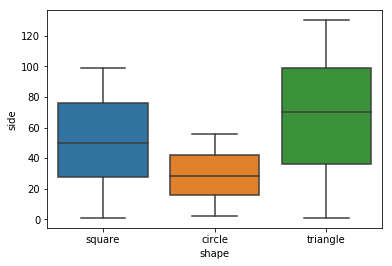

In [11]:
#8. Draw a boxplot showing the side size distribution for each shape - what can you infer from this plot?
sns.boxplot(x= 'shape', y ='side', data=d2)  

In [ ]:
# Inference from above plot:


Text(110,8000,'triangle')

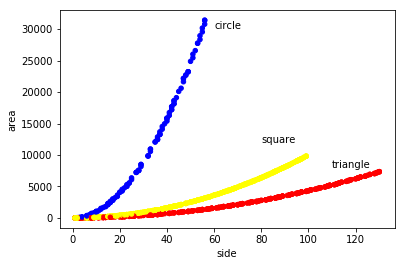

In [12]:
# 9. Make a scatter plot with "side" on the x axis, "area" on the y axis with a different color for each shape.
colors = {'circle': 'blue', 'triangle': 'red', 'square' : 'yellow'}
d2.plot(kind = 'scatter', x = 'side', y = 'area', c=d2['shape'].apply(lambda x: colors[x]))
plt.annotate('circle', xy=(60, 30000))
plt.annotate('square', xy=(80, 12000))
plt.annotate('triangle', xy=(110, 8000))

In [13]:
d2.head()

,shape,color,area,side
0,square,yellow,9409.0,97.0
1,circle,yellow,4071.5,20.0
2,triangle,blue,2028.0,68.0
3,square,blue,3025.0,55.0
4,square,blue,9216.0,96.0


In [28]:
#10 a. The proportion of red objects within the shape
print('Proportion of red objects within the shape:')

df = {'shape':[], 'proportion_red': [], 'tot_shape': []}
for shape in d2[d2['color']=='red']['shape'].unique():
    df['shape'].append(shape)
    df['proportion_red'].append(len(d2[(d2['color']=='red') & (d2['shape']==shape)])/len(d2[d2['shape']==shape]))
    df['tot_shape'].append(len(d2[d2['shape']==shape]))
    
df = pd.DataFrame(df)
df

Proportion of red objects within the shape:


,shape,proportion_red,tot_shape
0,triangle,0.506203,403
1,square,0.117400,477
2,circle,0.250000,120


In [23]:
d2[d2['color']=='red']['shape'].unique()

array(['triangle', 'square', 'circle'], dtype=object)

In [ ]:
'''
10. Create a dataframe, table or list that show for each shape:
          a. The proportion of red objects within the shape
          b. The proportion of blue area out of the shape's total area 
          (sum of square inch blue area of the shape over sum of all shape size).
11. Create a function that calculates 10. b. for a given shape and color.

'''

In [24]:
df = {'shape':[], }
for shape in d2[d2['color']=='red']['shape'].unique():
    df['shape'].append(shape)
    

AttributeError: 'numpy.ndarray' object has no attribute 'ennumerate'